# Gradient Boosting Regressor

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
# yf.pdr_override()

In [17]:

csv_file_path = r"D:\AbleAid\StockPradiction\DB_csv\unadjusted_amarstock\1JANATAMF.csv"

# Load the CSV file into a DataFrame
dataset = pd.read_csv(csv_file_path)


# Example: Fetching data for Apple Inc. (AAPL)
# dataset = yf.download("AMD", start="2007-01-01", end="2018-11-16")
print(dataset.head(10))


# View Columns
# dataset.head()

    timestamp  opening  high   low  close  adj_close    volume
0  2010-09-20     13.0  13.1  12.5   12.6       12.6  10323500
1  2010-09-21     12.8  13.2  12.7   12.9       12.9   3327500
2  2010-09-22     13.0  13.4  12.9   13.0       13.0   2765500
3  2010-09-23     13.3  13.4  13.0   13.0       13.0   2329000
4  2010-09-26     13.0  13.2  12.8   12.8       12.8   1608500


,timestamp,opening,high,low,close,adj_close,volume
0,2010-09-20,13.0,13.1,12.5,12.6,12.6,10323500
1,2010-09-21,12.8,13.2,12.7,12.9,12.9,3327500
2,2010-09-22,13.0,13.4,12.9,13.0,13.0,2765500
3,2010-09-23,13.3,13.4,13.0,13.0,13.0,2329000
4,2010-09-26,13.0,13.2,12.8,12.8,12.8,1608500


In [22]:
dataset['Increase_Decrease'] = np.where(dataset['volume'].shift(-1) > dataset['volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['opening'].shift(-1) > dataset['opening'],1,0)
dataset['Buy_Sell'] = np.where(dataset['adj_close'].shift(-1) > dataset['adj_close'],1,0)
dataset['Returns'] = dataset['adj_close'].pct_change()
dataset = dataset.dropna()
dataset.head()

,timestamp,opening,high,low,close,adj_close,volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
1,2010-09-21,12.8,13.2,12.7,12.9,12.9,3327500,0,1,1,0.023810
2,2010-09-22,13.0,13.4,12.9,13.0,13.0,2765500,0,1,0,0.007752
3,2010-09-23,13.3,13.4,13.0,13.0,13.0,2329000,0,0,0,0.000000
4,2010-09-26,13.0,13.2,12.8,12.8,12.8,1608500,0,0,0,-0.015385
5,2010-09-27,12.7,13.0,12.6,12.6,12.6,1332000,0,0,0,-0.015625


In [23]:
X = dataset[['opening', 'high', 'low', 'volume']].values
Y = dataset['adj_close'].values

In [24]:
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/4, random_state = 0) 

In [25]:
print("train length: " , len(X_train))
print("test length: " , len(X_test))


train length:  2360
test length:  787


In [26]:
# Checking the minimum, maximum, and average values of Y_test
min_value = Y_test.min()
max_value = Y_test.max()
average_value = Y_test.mean()

print("Minimum value of Y_test: {:.3f}".format(min_value))
print("Maximum value of Y_test: {:.3f}".format(max_value))
print("Average value of Y_test: {:.3f}".format(average_value))


Minimum value of Y_test: 3.900
Maximum value of Y_test: 13.000
Average value of Y_test: 6.184


In [27]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(max_depth=4, 
            n_estimators=200,
            random_state=2)

In [28]:
# Fit gb to the training set
gb.fit(X_train, Y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

In [29]:
import joblib
joblib.dump(gb, 'gradient_boosting_model.pkl')


['gradient_boosting_model.pkl']

In [30]:
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(Y_test, y_pred)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 0.088


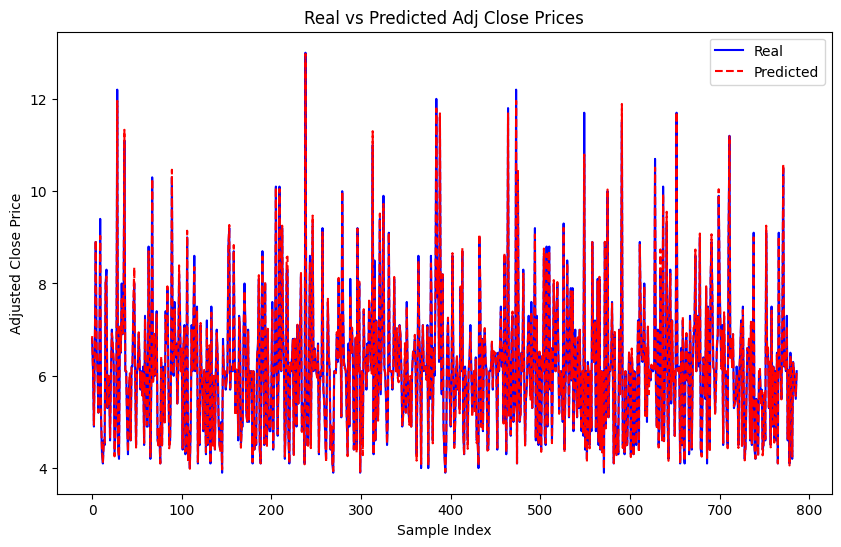

In [31]:
# Plotting Real vs Predicted values
plt.figure(figsize=(10, 6))
plt.plot(Y_test, color='blue', label='Real')
plt.plot(y_pred, color='red', linestyle='--', label='Predicted')
plt.title('Real vs Predicted Adj Close Prices')
plt.xlabel('Sample Index')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

Training size: 0.10, Train R2: 0.9999, Test R2: 0.9932
Training size: 0.20, Train R2: 0.9997, Test R2: 0.9952
Training size: 0.30, Train R2: 0.9995, Test R2: 0.9962
Training size: 0.40, Train R2: 0.9994, Test R2: 0.9965
Training size: 0.50, Train R2: 0.9993, Test R2: 0.9964
Training size: 0.59, Train R2: 0.9991, Test R2: 0.9966
Training size: 0.69, Train R2: 0.9990, Test R2: 0.9962
Training size: 0.79, Train R2: 0.9990, Test R2: 0.9963
Training size: 0.89, Train R2: 0.9989, Test R2: 0.9968
Training size: 0.99, Train R2: 0.9989, Test R2: 0.9966


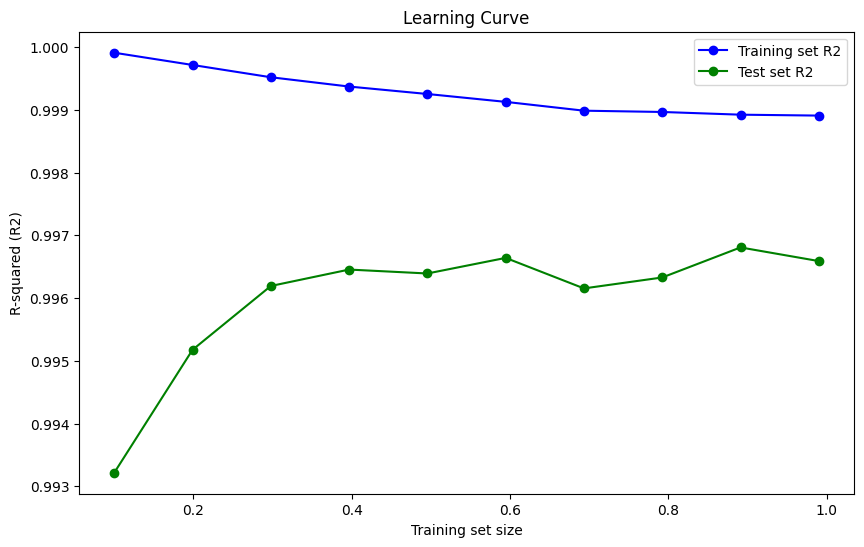

In [32]:
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

train_sizes = np.linspace(0.1, 0.99, 10)  # Adjusted upper limit to avoid 1.0
train_scores = []
test_scores = []

for train_size in train_sizes:
    X_train_part, _, Y_train_part, _ = train_test_split(X_train, Y_train, train_size=float(train_size), random_state=0)
    gb.fit(X_train_part, Y_train_part)
    train_pred = gb.predict(X_train_part)
    test_pred = gb.predict(X_test)
    
    train_r2 = r2_score(Y_train_part, train_pred)
    test_r2 = r2_score(Y_test, test_pred)
    
    train_scores.append(train_r2)
    test_scores.append(test_r2)
    
    # Print the accuracy score for the current training size
    print(f"Training size: {train_size:.2f}, Train R2: {train_r2:.4f}, Test R2: {test_r2:.4f}")

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, color='blue', marker='o', label='Training set R2')
plt.plot(train_sizes, test_scores, color='green', marker='o', label='Test set R2')
plt.xlabel('Training set size')
plt.ylabel('R-squared (R2)')
plt.title('Learning Curve')
plt.legend()
plt.show()
